### Problématique : 

Étant donné les caractéristiques d'un appartement, quel est serait le loyer ?

La seule caractéristique dont nous disposons est la surface de l'appartement. Notre training set est un ensemble de N = 545 observations de surface et leur loyer associé :  (x,y)=(surface,loyer) 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
house_data = pd.read_csv('house.csv')

In [61]:
house_data.head()

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70


In [62]:
house_data.columns

Index(['loyer', 'surface'], dtype='object')

In [63]:
house_data.shape

(545, 2)

In [64]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 2 columns):
loyer      545 non-null int64
surface    545 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


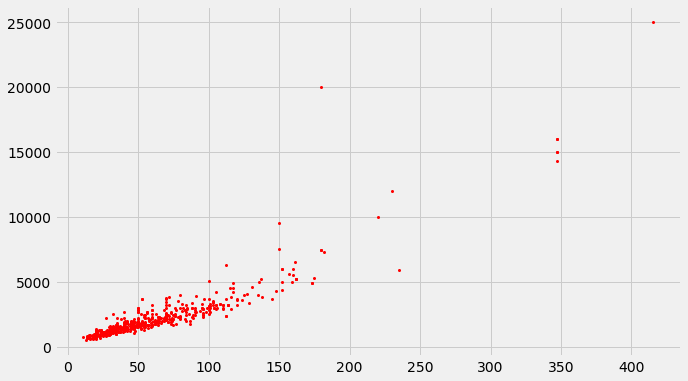

In [65]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=2)

### Décomposition du dataset & transformation en matrices pour pouvoir effectuer le calcul

In [66]:
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface'].values]).T
y = np.matrix(house_data['loyer']).T
X

matrix([[ 1., 37.],
        [ 1., 32.],
        [ 1., 26.],
        ...,
        [ 1., 70.],
        [ 1., 42.],
        [ 1., 44.]])

In [67]:
y

matrix([[ 1330],
        [ 1400],
        [  904],
        [  955],
        [ 2545],
        [  970],
        [ 1560],
        [ 1960],
        [ 2000],
        [ 2600],
        [ 3280],
        [16000],
        [  980],
        [ 1250],
        [  752],
        [  815],
        [ 1147],
        [ 1500],
        [ 3587],
        [ 1355],
        [ 1245],
        [ 1100],
        [ 1120],
        [ 1225],
        [ 1250],
        [ 1280],
        [ 1114],
        [ 1290],
        [ 1300],
        [ 1300],
        [ 1304],
        [ 1340],
        [ 1344],
        [ 1290],
        [ 1364],
        [ 1400],
        [ 1400],
        [ 1420],
        [ 1420],
        [ 1445],
        [ 1500],
        [ 1544],
        [ 1550],
        [ 1500],
        [ 1612],
        [ 1650],
        [ 1533],
        [ 1663],
        [ 1584],
        [ 1680],
        [ 1700],
        [ 1700],
        [ 1700],
        [ 1700],
        [ 1700],
        [ 1600],
        [ 1700],
        [ 1710],
        [ 1600

In [68]:
# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

print(theta)

[[-283.37836117]
 [  40.97116431]]


### Résultat :

Notre modèle final qui fitte les données sera donc dans notre cas (approximativement) :

loyer = 30 × surface + 294.3

On peut représenter graphiquement la droite qu'on a trouvée pour vérifier qu'elle colle bien aux données

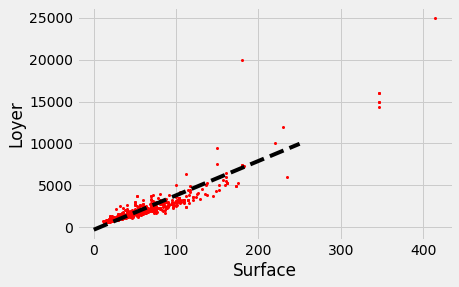

In [69]:
plt.xlabel('Surface')
plt.ylabel('Loyer')


plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=2)

# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')
plt.show()

### Utiliser le modèle pour effectuer des prédictions

In [71]:
# Par exemple, pour une surface de 35m carré :
theta.item(0) + theta.item(1) * 35
# on obtient une estimation du loyer

1150.612389740233

### Implémentation avec le package scikit-learn.

In [ ]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(surface, loyer)
regr.predict(donnee_test)